In [1]:
# Подгружаем необходимые пакеты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Эта команда говорит python, чтобы рисунки matplotlib встраивались в документ
%matplotlib inline

In [3]:
# устанавливаем тему seaborn
sns.set_theme()

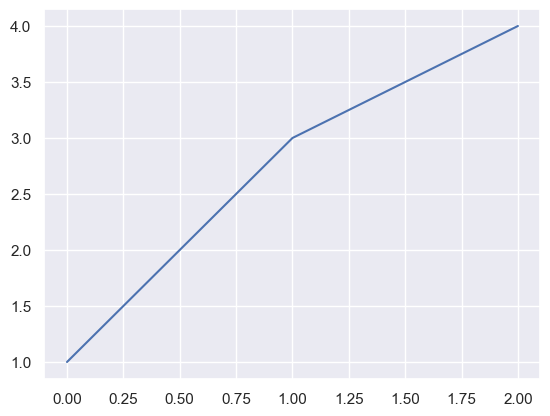

In [4]:
# демонстрация рисунка
plt.plot([1,3,4])

## Загружаем данные из таблицы
Здесь мы загружаем листы из книги MS Excel

In [5]:
# одновременно загружаем первые три листа электронной книги MS Excel 
sheets = pd.read_excel('3.xlsx', sheet_name=[0,1,2])

И сразу же отображаем содержимое

In [6]:
sheets[0].head()

,ID операции,Дата,ID магазина,Артикул,"Количество упаковок, шт.",Тип операции,Цена руб./шт.
0,1,2021-06-01,M1,4,180,Поступление,75
1,2,2021-06-01,M1,4,180,Продажа,75
2,3,2021-06-01,M1,5,180,Поступление,70
3,4,2021-06-01,M1,5,170,Продажа,70
4,5,2021-06-01,M1,6,180,Поступление,50


In [7]:
sheets[1].head()

,Артикул,Отдел,Наименование товара,Ед. изм,Количество в упаковке,Поставщик
0,1,Молоко,Молоко ультрапастеризованное,литр,1.0,Молокозавод №1
1,2,Молоко,Молоко безлактозное,литр,0.5,Экопродукты
2,3,Молоко,Молоко детское с 8 месяцев,литр,0.2,Молокозавод №1
3,4,Молоко,"Кефир 3,2%",литр,1.0,Молокозавод №2
4,5,Молоко,Кефир обезжиренный,литр,1.0,Молокозавод №2


In [8]:
sheets[2].head()

,ID магазина,Район,Адрес
0,M1,Октябрьский,"просп. Мира, 45"
1,M2,Первомайский,"ул. Металлургов, 12"
2,M3,Заречный,"Колхозная, 11"
3,M4,Первомайский,"Заводская, 22"
4,M5,Октябрьский,"ул. Гагарина, 17"


In [9]:
#выделяем те идентификаторы магазинов, что назодятся в Заречном районе
shop_ids = sheets[2].loc[ sheets[2]['Район'] == "Заречный" ]['ID магазина']

#выделяем все артикулы яиц диетических
product_ids = sheets[1].loc[ sheets[1]['Наименование товара'] == "Яйцо диетическое" ]['Артикул']

# в таблице движение товара ищем те строки, где ID Магазина один из shop_ids, а артикул один из product_ids
tovar = sheets[0].loc[ 
    sheets[0]['ID магазина'].isin(shop_ids) 
    & 
    sheets[0]['Артикул'].isin(product_ids) ][['Количество упаковок, шт.','Тип операции']]

# вычисляем остаток яиц диетических в конце выбранного периода
ostlos = tovar.loc[ tovar['Тип операции'] == 'Поступление' ]['Количество упаковок, шт.'].sum() - tovar.loc[ tovar['Тип операции'] == 'Продажа' ]['Количество упаковок, шт.'].sum()

print(tovar.loc[ tovar['Тип операции'] == 'Поступление' ]['Количество упаковок, шт.'].sum())
print(tovar.loc[ tovar['Тип операции'] == 'Продажа' ]['Количество упаковок, шт.'].sum())

1420
454
